# Assignment 4

In this assignment, you'll combine the assignment 3 data set with nutrition data from the [USDA Food Composition Databases](https://ndb.nal.usda.gov/ndb/search/list). The CSV file `fresh.csv` contains the fresh fruits and vegetables data you extracted in assignment 3.

The USDA Food Composition Databases have a [documented](https://ndb.nal.usda.gov/ndb/doc/index) web API that returns data in JSON format . You need a key in order to use the API. Only 1000 requests are allowed per hour, so it would be a good idea to use [caching][requests_cache].

[Sign up for an API key here](https://api.data.gov/signup/). The key will work with any Data.gov API. You may need the key again later in the quarter, so make sure you save it.

These modules may be useful:

* [requests](http://docs.python-requests.org/en/master/user/quickstart/)
* [requests_cache][]
* [urlparse](https://docs.python.org/2/library/urlparse.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/)

[requests_cache]: https://pypi.python.org/pypi/requests-cache

__Exercise 1.1.__ Read the [search request documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-SEARCH.md), then write a function called `ndb_search()` that makes a search request. The function should accept the search term as an argument. The function should return the search result items as a list (for 0 items, return an empty list).

Note that the search url is: `https://api.nal.usda.gov/ndb/search`

As an example, a search for `"quail eggs"` should return this list:

```python
[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]
```

As usual, make sure you document and test your function.

In [484]:
import requests
import pandas as pd
import numpy as np
import requests_cache
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
def ndb_search(search_term, key):
    ''' Make a request to the database api on the given search team
    Args:
        search_term(string): the term we are going to search on the database
        key(string): Api key.
    Returns:
        a list of results and it will be an empty list when no searching result in the database.
    '''
    url = 'https://api.nal.usda.gov/ndb/search'
    response =  requests.get(url, params={'api_key': key, 'q': search_term,'format': 'JSON'})
    response.raise_for_status()
    if response.json().keys() == ['errors']:
        return []
    else:
        return response.json()['list']['item']

In [54]:
requests_cache.install_cache('db_cache')
key = '2fkEnZIKQy85Hal7DzqfZhPDV3eICrvlbEaan7u0'

test1 = ndb_search("quail eggs" , key)
test2 = ndb_search("quaiwwrl eggs" , key)

print test2
test1

[]


[{u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'CHAOKOH, QUAIL EGG IN BRINE, UPC: 044738074186',
  u'ndbno': u'45094707',
  u'offset': 0},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'L&W, QUAIL EGGS, UPC: 024072000256',
  u'ndbno': u'45094890',
  u'offset': 1},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'BUDDHA, QUAIL EGGS IN BRINE, UPC: 761934535098',
  u'ndbno': u'45099560',
  u'offset': 2},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u'GRAN SABANA, QUAIL EGGS, UPC: 819140010103',
  u'ndbno': u'45169279',
  u'offset': 3},
 {u'ds': u'BL',
  u'group': u'Branded Food Products Database',
  u'name': u"D'ARTAGNAN, QUAIL EGGS, UPC: 736622102630",
  u'ndbno': u'45178254',
  u'offset': 4},
 {u'ds': u'SR',
  u'group': u'Dairy and Egg Products',
  u'name': u'Egg, quail, whole, fresh, raw',
  u'ndbno': u'01140',
  u'offset': 5}]

__Exercise 1.2.__ Use your search function to get NDB numbers for the foods in the `fresh.csv` file. It's okay if you don't get an NDB number for every food, but try to come up with a strategy that gets most of them. Discuss your strategy in a short paragraph.

Hints:

* The foods are all raw and unbranded.
* You can test search terms with the [online search page](https://ndb.nal.usda.gov/ndb/search/list).
* You can convert the output of `ndb_search()` to a data frame with `pd.DataFrame()`.
* The string methods for [Python](https://docs.python.org/2/library/stdtypes.html#string-methods) and [Pandas](http://pandas.pydata.org/pandas-docs/stable/text.html#method-summary) are useful here. It's okay if you use _simple_ regular expressions in the Pandas methods, although this exercise can be solved without them.
* You can merge data frames that have a column in common with `pd.merge()`.

In [335]:
def get_ndbno(csv, key = '2fkEnZIKQy85Hal7DzqfZhPDV3eICrvlbEaan7u0'):
    ''' get the NDB numbers
    Args:
        csv: a pd data frame of csv
        key: Api key
    return:
        dict: NDM numbers
    '''
    ndbno = {}
    
    for food in csv['food']:
        result_ls = ndb_search(food + ' raw' , key) # search 'name raw'
        df = pd.DataFrame(result_ls)
        
        if df.empty:
            ndbno[food] = []
            continue
        # make a filter on 'group' to gurantee unbranded    
        df1 = df[(df['group'] == 'Fruits and Fruit Juices') | (df['group'] == 'Vegetables and Vegetable Products')]

        if len(df1['name']) == 0:
            ndbno[food] = []
            continue
        # Choose the shortest string    
        idx_min = np.argmin(map(len, df1['name']))
        ndbno[food] = df1.reset_index().ix[idx_min,'ndbno']
    
    return ndbno 
    

In [336]:
fresh = pd.read_csv('fresh.csv', header=0)
NDB = get_ndbno(fresh)
sum(map(lambda i: i == [], NDB.values())) # number of null 

8

My filtering strategy is that:
1. search food + raw. ie(apples raw)
2. filter the group by 'Fruits and Fruit Juices' or 'Vegetables and Vegetable Products' to gurantee unbranded
3. choose the one with the shortest name

<h4>I have tried to filter by finding patterns like r'^apples,' and r' apples,' to make more precise searching. However, I found some of the food in 'name' are in plural form while the name in fresh.csv which I have used in regex is singel which makes no matching in my previous searching function. Therefore, I give up for that strategy</h4>

__Exercise 1.3.__ Read the [food reports V2 documentation](https://ndb.nal.usda.gov/ndb/doc/apilist/API-FOOD-REPORTV2.md), then write a function called `ndb_report()` that requests a _basic_ food report. The function should accept the NDB number as an argument and return the list of nutrients for the food.

Note that the report url is: `https://api.nal.usda.gov/ndb/V2/reports`

For example, for `"09279"` (raw plums) the first element of the returned list should be:

```python
{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}
```

Be sure to document and test your function.

In [386]:
def ndb_report(ndbno, key = '2fkEnZIKQy85Hal7DzqfZhPDV3eICrvlbEaan7u0'):
    '''get report for a type of food:
    Args:
        ndbno(string): NDB number
        key: API keys
    Returns:
        list of report
    '''
    url = 'https://api.nal.usda.gov/ndb/V2/reports'
    response = requests.get(url, params={'api_key': key, 'ndbno': ndbno, 'format': 'JSON'})
    response.raise_for_status()
    doc = response.json()
    return doc['foods'][0]['food']['nutrients']

In [384]:
ndb_report('09279')[0]

{u'group': u'Proximates',
 u'measures': [{u'eqv': 165.0,
   u'eunit': u'g',
   u'label': u'cup, sliced',
   u'qty': 1.0,
   u'value': u'143.93'},
  {u'eqv': 66.0,
   u'eunit': u'g',
   u'label': u'fruit (2-1/8" dia)',
   u'qty': 1.0,
   u'value': u'57.57'},
  {u'eqv': 151.0,
   u'eunit': u'g',
   u'label': u'NLEA serving',
   u'qty': 1.0,
   u'value': u'131.72'}],
 u'name': u'Water',
 u'nutrient_id': u'255',
 u'unit': u'g',
 u'value': u'87.23'}

__Exercise 1.4.__ Which foods provide the best combination of price, yield, and nutrition? You can use kilocalories as a measure of "nutrition" here, but more a detailed analysis is better. Use plots to support your analysis.

In [467]:
# set empty list as NaN
ndbno_df = pd.DataFrame(pd.Series(NDB)).reset_index().rename(columns={'index': 'food', 0: 'ndbno'})
ndbno_df[[not i for i in ndbno_df['ndbno']]] = np.nan
fresh_ndb = fresh.merge(ndbno_df, how='left', on='food', sort='lb_per_cup')

# scape the report of nutrition(kilocalories)
nutrition = []
for number in fresh_ndb['ndbno']:
    if pd.isnull(number):
        nutrition.append(np.nan)
    else:
        idx = np.array([i['name'] for i in ndb_report(number)]) == 'Energy'
        value = np.array(ndb_report(number))[idx][0]['value']
        nutrition.append(value)
        
    
        

In [476]:
# merge
#fresh_ndb['nutrition'] = nutrition
fresh_ndb.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,nutrition
0,Fresh1,1.172248,0.458554,0.451948,1.155360,acorn_squash,vegetables,NaN,NaN
1,Fresh1,1.567515,0.900000,0.242508,0.422373,apples,fruit,09312,25
2,Fresh1,3.040072,0.930000,0.363763,1.189102,apricots,fruit,09021,48
3,Fresh1,2.213050,0.375309,0.385809,2.274967,artichoke,vegetables,11226,73
4,Fresh1,3.213494,0.493835,0.396832,2.582272,asparagus,vegetables,11011,20


In [481]:
# Design the index for scoring the combination and sort the df by that index
fresh_ndb.dropna(inplace=True)
fresh_ndb['index_combined'] = fresh_ndb['nutrition'].astype(int) * fresh_ndb['yield'].astype(float) / fresh_ndb['price_per_lb'].astype(float)
fresh_ndb.sort_values('index_combined', inplace=True, ascending=False)
fresh_ndb.head()

,form,price_per_lb,yield,lb_per_cup,price_per_cup,food,type,ndbno,nutrition,index_combined
6,Fresh1,0.566983,0.640000,0.330693,0.292965,bananas,fruit,09040,89,100.461492
39,Fresh1,0.564320,0.811301,0.264555,0.184017,potatoes,vegetables,11362,58,83.384393
32,Fresh1,1.035173,0.730000,0.407855,0.578357,oranges,fruit,09216,97,68.404043
48,Fresh1,0.333412,0.520000,0.330693,0.212033,watermelon,fruit,09326,30,46.788953
20,Fresh1,2.093827,0.960000,0.330693,0.721266,grapes,fruit,11974,93,42.639618


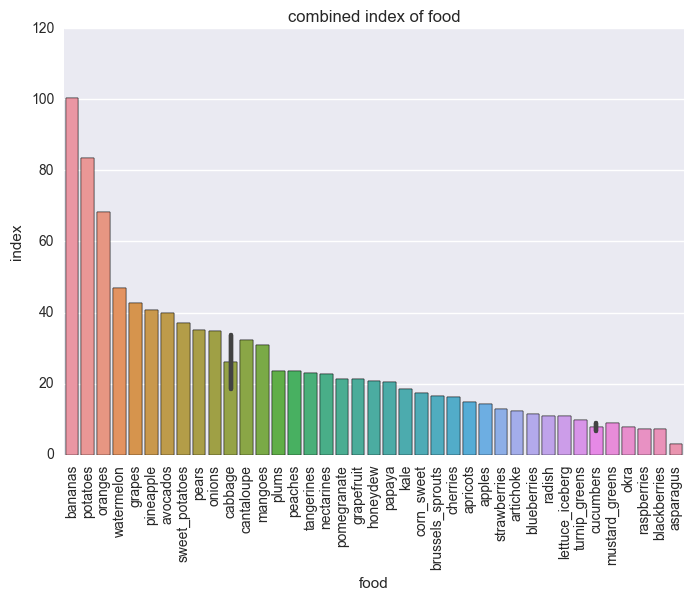

In [485]:
sns.barplot(x='food', y='index_combined', data=fresh_ndb)
plt.title('combined index of food')
plt.xticks(rotation='vertical')
plt.ylabel('index')
plt.xlabel('food')
plt.show()

My defination of best combination is the higher nutrition, higher yield with lower price. From the plot we can see that banana and potatoe are the most valuable food while asparagus has the least value.